This notebook will primarily be used to to complete the capstone project for the IBM Data Science Specialization certificate course. This project entails the analysis of the vehicle collisions that have occurred within Seattle, Washington to be able to predict the severity of future accidents.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data_collision = pd.read_csv("/Users/jesusaguirre/Desktop/Code/Data-Collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analyzing Data

In [9]:
data_collision.shape

(194673, 38)

In [10]:
data_collision.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [12]:
data_collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [38]:
c1 = data_collision[data_collision['SEVERITYCODE'] == 1].count()['SEVERITYCODE']
c1

136485

In [39]:
c2 = data_collision[data_collision['SEVERITYCODE'] == 2].count()['SEVERITYCODE']
c2

58188

In [40]:
c3= data_collision[data_collision['SEVERITYCODE'] == 3].count()['SEVERITYCODE']
c3

0

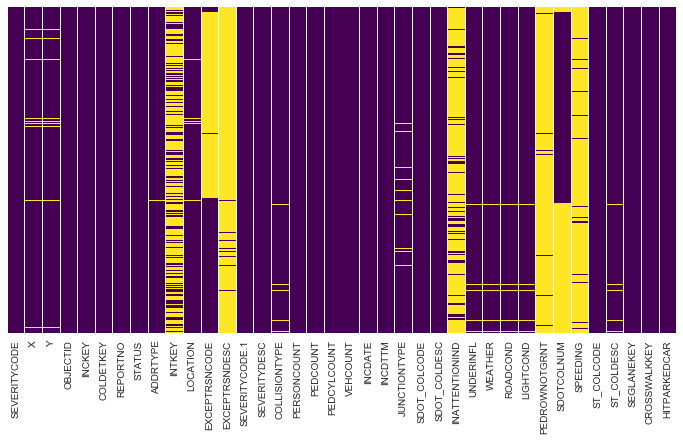

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(data_collision.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
data_collision.drop(['SPEEDING','SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND'
                    ,'EXCEPTRSNDESC','EXCEPTRSNCODE', 'INTKEY'], axis=1,inplace=True)

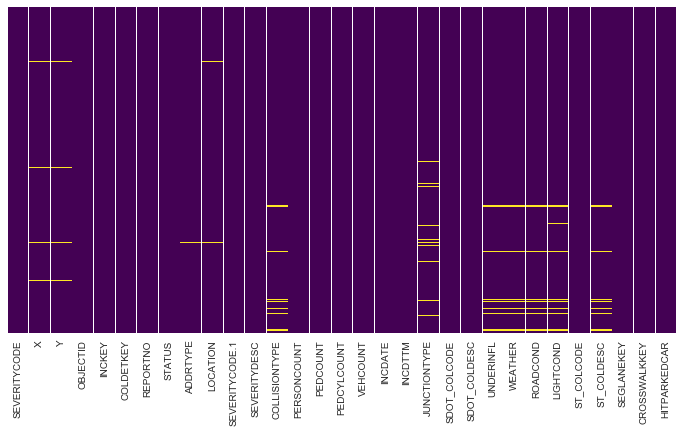

In [45]:
plt.figure(figsize = (12,6))
sns.heatmap(data_collision.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
new_collision = data_collision.dropna()

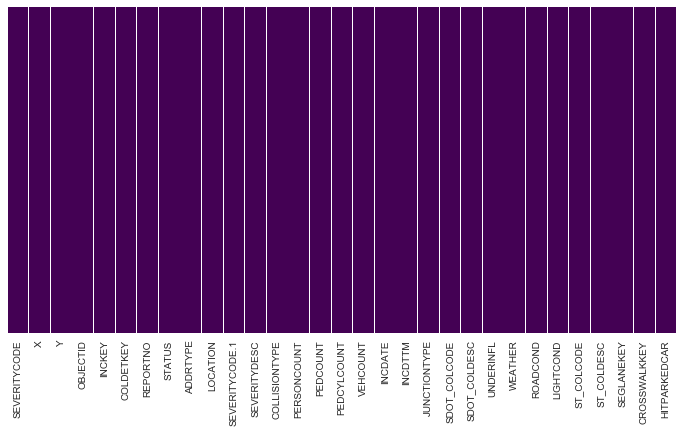

In [47]:
plt.figure(figsize = (12,6))
sns.heatmap(new_collision.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
new_collision.shape

(180067, 31)

In [54]:
new_collision['INCDATE'] = pd.to_datetime(new_collision['INCDATE'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
new_collision['Hour'] = new_collision['INCDATE'].apply(lambda time: time.hour)
new_collision['Month'] = new_collision['INCDATE'].apply(lambda time: time.month)
new_collision['Day of Week'] = new_collision['INCDATE'].apply(lambda time: time.dayofweek)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [59]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
new_collision['Day of Week'] = new_collision['Day of Week'].map(dmap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


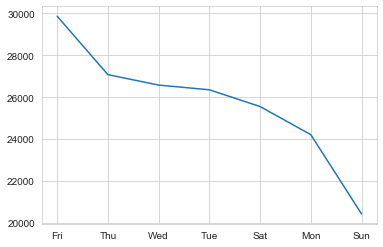

In [71]:
new_collision['Day of Week'].value_counts().plot(kind = 'line')

In [72]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Weather Condition for accidents')

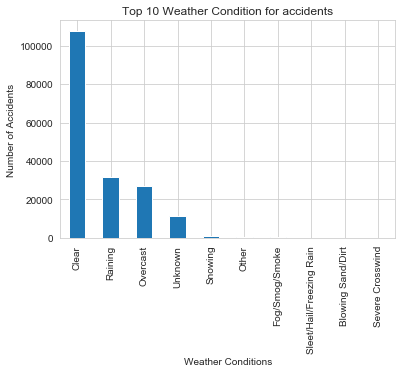

In [79]:
fig, ax=plt.subplots()
new_collision['WEATHER'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5, align='center')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
ax.tick_params()
plt.title('Top 10 Weather Condition for accidents')

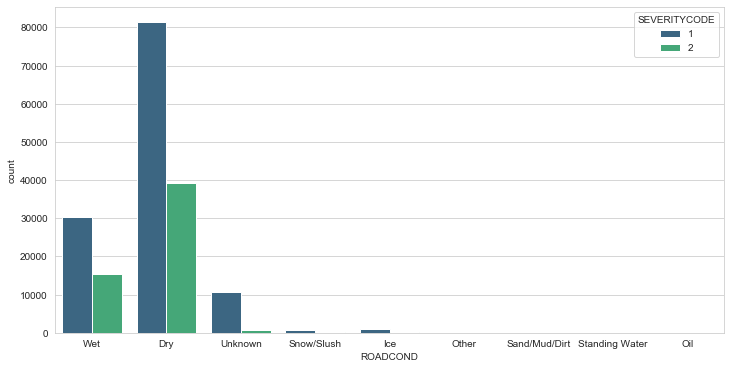

In [81]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'ROADCOND', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

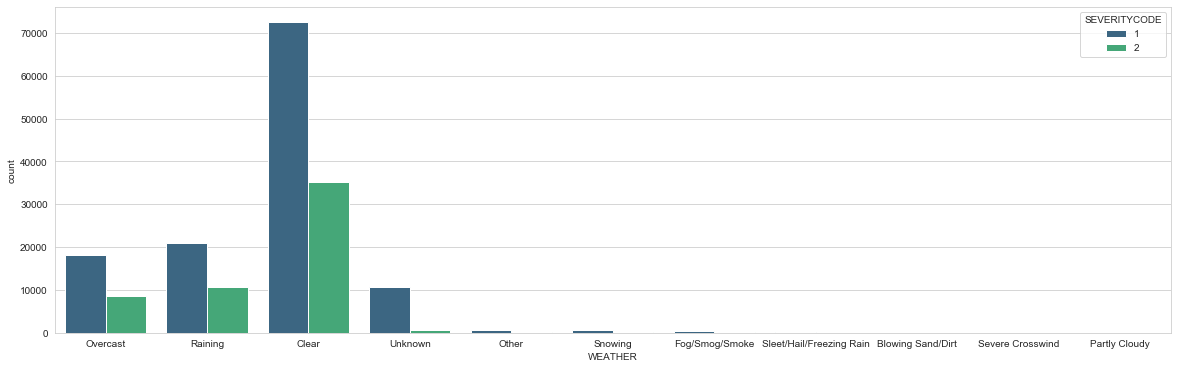

In [85]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'WEATHER', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

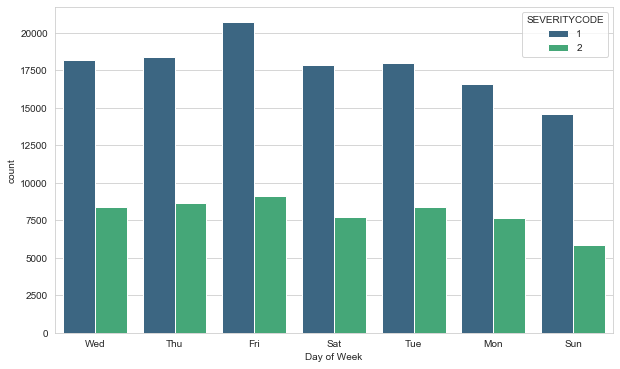

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Day of Week', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

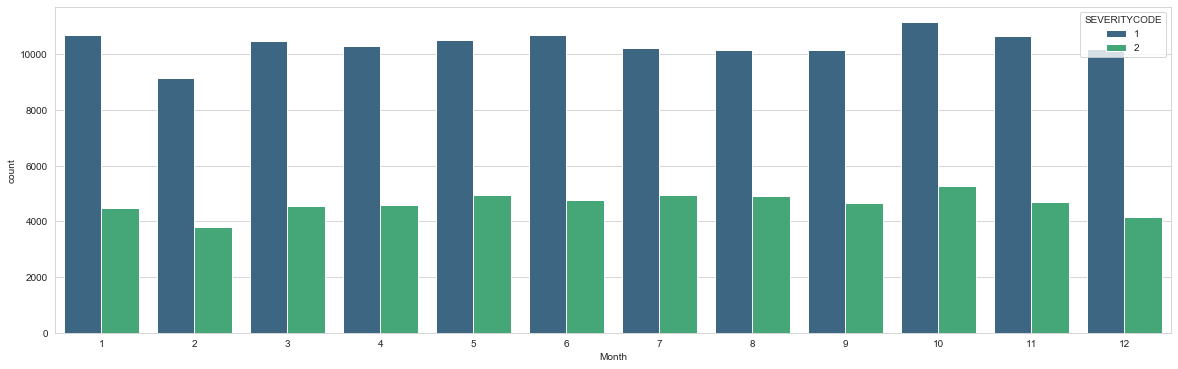

In [94]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Month', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

In [101]:
new_collision['Total'] = new_collision['INCKEY'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


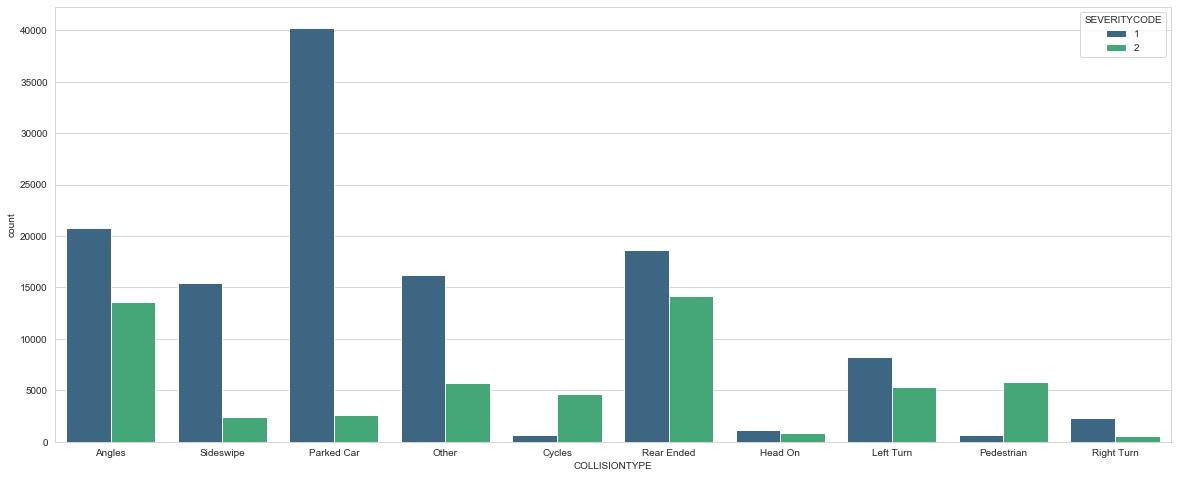

In [109]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'COLLISIONTYPE', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

[(-1, 9)]

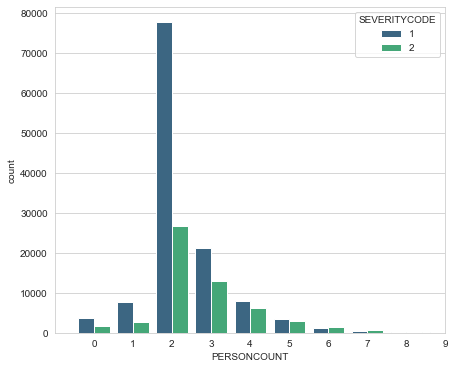

In [110]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PERSONCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(-1,9))

In [113]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

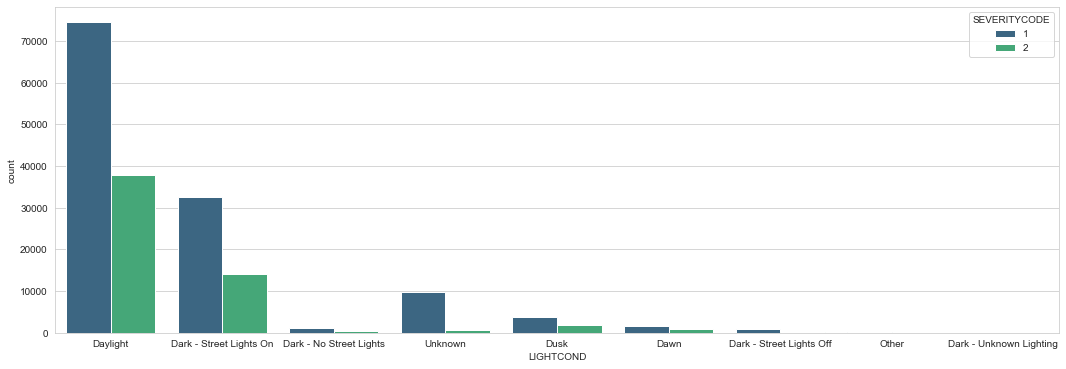

In [116]:
plt.figure(figsize = (18,6))
set = sns.countplot(x = 'LIGHTCOND', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

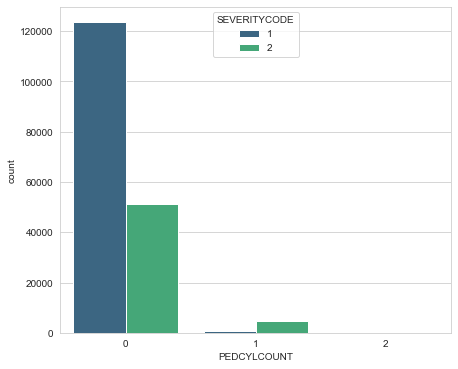

In [117]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PEDCYLCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

[(0, 6)]

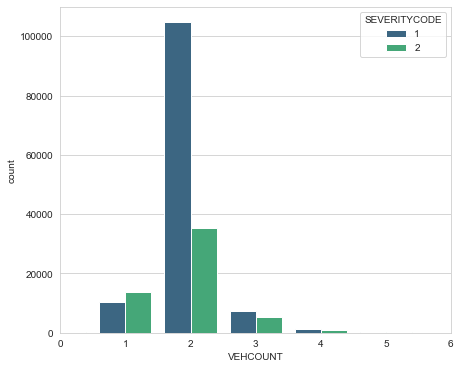

In [121]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'VEHCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(0,6))

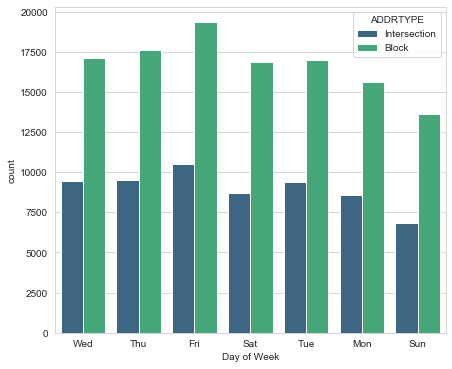

In [123]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'Day of Week', data = new_collision , 
              hue = 'ADDRTYPE', palette = 'viridis')

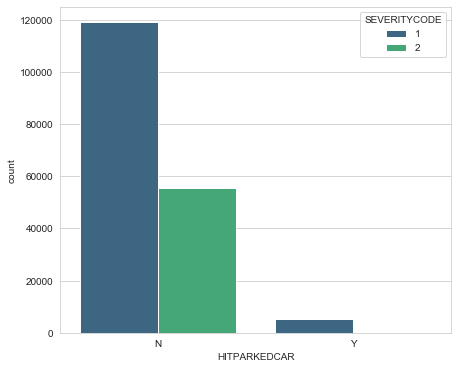

In [129]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'HITPARKEDCAR', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

In [126]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

In [143]:
log_df = new_collision[['SEVERITYCODE','Month', 'Day of Week','COLLISIONTYPE', 'PERSONCOUNT', 
          'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE','LIGHTCOND','WEATHER', 'ROADCOND',
          'HITPARKEDCAR']]

In [152]:
log_df.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,3,Angles,2,0,0,2,Intersection,Daylight,Overcast,Wet,N
1,1,12,3,Sideswipe,2,0,0,2,Block,Dark - Street Lights On,Raining,Wet,N
2,1,11,4,Parked Car,4,0,0,3,Block,Daylight,Overcast,Dry,N
3,1,3,5,Other,3,0,0,3,Block,Daylight,Clear,Dry,N
4,2,1,3,Angles,2,0,0,2,Intersection,Daylight,Raining,Wet,N


In [150]:
dmap_day = {'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5, 'Sat':6,'Sun':7}

In [151]:
log_df['Day of Week'] = new_collision['Day of Week'].map(dmap_day)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
dmap_collision = {'Parked Car':1,'Angles':2,'Rear Ended':3,'Other':4,'Sideswipe':5, 
                  'Left Turn':6,'Left Turn':7, 'Pedestrian':8, 'Cycles':9, 'Right Turn': 10,
                 'Head On': 11}

log_df['COLLISIONTYPE'] = log_df['COLLISIONTYPE'].map(dmap_collision)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [157]:
dmap_address = {'Block':1,'Intersection':2}

log_df['ADDRTYPE'] = log_df['ADDRTYPE'].map(dmap_address)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
log_df['ADDRTYPE'].value_counts()

1    117085
2     62982
Name: ADDRTYPE, dtype: int64

In [161]:
dmap_light = {'Daylight':1,'Dark - Street Lights On':2,'Unknown':3,'Dusk':4,'Dawn':5, 
                  'Dark - No Street Lights':6,'Dark - Street Lights Off':7, 
              'Other':8, 'Dark - Unknown Lighting':9}

log_df['LIGHTCOND'] = log_df['LIGHTCOND'].map(dmap_light)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [168]:
log_df['WEATHER'].value_counts()

1     107692
2      31719
3      26809
4      11505
5        875
6        728
7        549
8        112
9         49
10        24
11         5
Name: WEATHER, dtype: int64

In [167]:
dmap_weather = {'Clear':1,'Raining':2,'Overcast':3,'Unknown':4,'Snowing':5, 
                  'Other':6,'Fog/Smog/Smoke':7, 
              'Sleet/Hail/Freezing Rain':8, 'Blowing Sand/Dirt':9, 'Severe Crosswind':10,
               'Partly Cloudy': 11}

log_df['WEATHER'] = log_df['WEATHER'].map(dmap_weather)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
dmap_roadcond = {'Dry':1,'Wet':2,'Unknown':3,'Ice':4,'Snow/Slush':5, 
                  'Other':6,'Standing Water':7, 
              'Sand/Mud/Dirt':8, 'Oil': 9}

log_df['ROADCOND'] = log_df['ROADCOND'].map(dmap_roadcond)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [175]:
dmap_hitcar = {'N':1,'Y':2}

log_df['HITPARKEDCAR'] = log_df['HITPARKEDCAR'].map(dmap_hitcar)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
log_df.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,3,2,2,0,0,2,2,1,3,2,1
1,1,12,3,5,2,0,0,2,1,2,2,2,1
2,1,11,4,1,4,0,0,3,1,1,3,1,1
3,1,3,5,4,3,0,0,3,1,1,1,1,1
4,2,1,3,2,2,0,0,2,2,1,2,2,1


In [181]:
log_df.columns

Index(['SEVERITYCODE', 'Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR'],
      dtype='object')

# Predictive Model

In [183]:
from sklearn.model_selection import train_test_split

In [185]:
X = log_df[['Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR']]
y = log_df['SEVERITYCODE']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
predictions = logmodel.predict(X_test)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     41103
           2       0.78      0.24      0.37     18320

    accuracy                           0.74     59423
   macro avg       0.76      0.60      0.60     59423
weighted avg       0.75      0.74      0.69     59423



In [192]:
print(confusion_matrix(y_test,predictions))

[[39886  1217]
 [13953  4367]]


In [194]:
logmodel.score(X_test, y_test)

0.7447116436396681